# Sensitivity results

The best way of understanding how a TDT algorithm adapts is by placing it in various settings.
Traditionally, the TDT community interpreted those settings as different datasets, which made sense: at least, different datasets would present different scenarios.

However, TDT left aside one variation of scenarios: popular and unpopular events.

In this notebook, we show how two algorithms, ELD and SEER, diverged in their performance as the datasets grew smaller.
Although SEER already out-performed ELD with 100% of the data, the smaller the datasets grew, the larger the differences.

In [1]:
import os
import sys

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.patheffects as pe
import pandas as pd

sys.path.append(os.path.expanduser("~/GitHub/multiplex-plot"))
sys.path = list(set(sys.path))

from multiplex import drawable

In [2]:
df = pd.DataFrame(columns=[ 'algorithm', 'data', 'precision', 'recall', 'f-score' ])
df.loc[len(df)] = [ 'ELD', 'All tweets', 53.74, 56.73, 55.04 ]
df.loc[len(df)] = [ 'ELD', '50,000', 60.54, 43.27, 50.69 ]
df.loc[len(df)] = [ 'ELD', '25,000', 66.22, 25.00, 36.68 ]
df.loc[len(df)] = [ 'ELD', '10,000', 93.75, 11.54, 19.67 ]
df.loc[len(df)] = [ 'SEER', 'All tweets', 71.43, 55.77, 62.89 ]
df.loc[len(df)] = [ 'SEER', '50,000', 65.43, 48.08, 55.54 ]
df.loc[len(df)] = [ 'SEER', '25,000', 68.09, 45.19, 54.52 ]
df.loc[len(df)] = [ 'SEER', '10,000', 60.74, 42.31, 50.34 ]
df['step'] = df.data.map({ 'All tweets': 3, '50,000': 2, '25,000': 1, '10,000': 0 })
df

,algorithm,data,precision,recall,f-score,step
0,ELD,All tweets,53.74,56.73,55.04,3
1,ELD,"50,000",60.54,43.27,50.69,2
2,ELD,"25,000",66.22,25.00,36.68,1
3,ELD,"10,000",93.75,11.54,19.67,0
4,SEER,All tweets,71.43,55.77,62.89,3
5,SEER,"50,000",65.43,48.08,55.54,2
6,SEER,"25,000",68.09,45.19,54.52,1
7,SEER,"10,000",60.74,42.31,50.34,0


In [3]:
# create a style for the precision
plt.style.use(os.path.join(os.getcwd(), '../modern-custom.style'))
style = { 'linewidth': 4, 'with_legend': True,
          'path_effects': [ pe.Stroke(linewidth=6, foreground='C4'), pe.Normal() ] }
marker_style = { 'marker': 'o', 'markersize': 12 }
scatter_style = dict(marker_style)
scatter_style.update({ 's': scatter_style['markersize'] ** 2, 'zorder': 100 })
del scatter_style['markersize']
annotation_marker_style = dict(marker_style)
annotation_marker_style.update({ 'markersize': 16, 'markeredgewidth': 3, 'markeredgecolor': 'C4' })
line_style = { 'alpha': 0.3, 'linestyle': '--', 'linewidth': 1 }
annotation_style = { 'fontsize': 'smaller', 'va': 'bottom', 'alpha': 0.8, 'pad': 0, 'facecolor': '#ffffff99' }

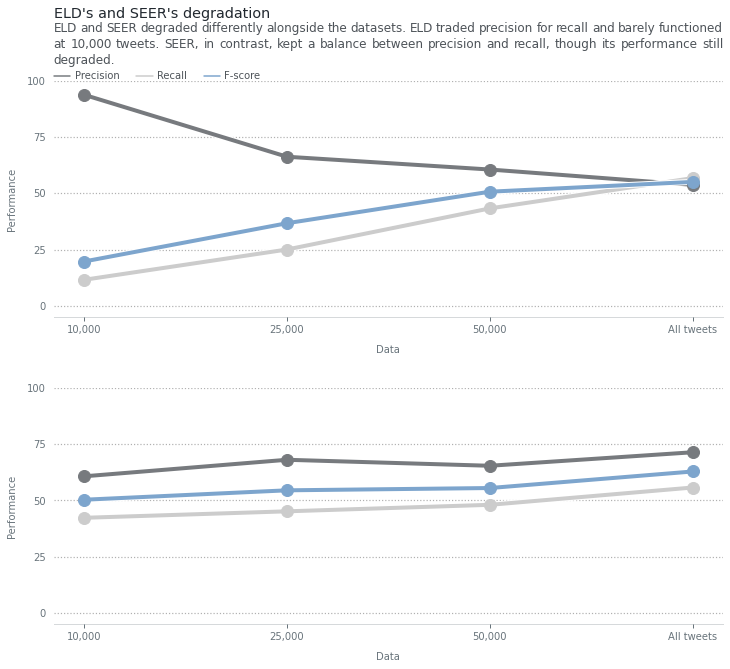

In [4]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,10))

# draw ELD's progression
_df = df[df.algorithm == 'ELD'].sort_values(by='step')
_x = _df.step.tolist()
annotations = {  }

# draw the visualization
viz = drawable.Drawable(figure, ax1)
viz.draw_time_series(_x, _df['precision'].tolist(), 'Precision', color='C3', **style)
viz.draw_time_series(_x, _df['recall'].tolist(), 'Recall', color='C5', **style)
viz.draw_time_series(_x, _df['f-score'].tolist(), 'F-score', color='C1', **style)
viz.scatter(_x, _df['precision'].tolist(), color='C3', **scatter_style)
viz.scatter(_x, _df['recall'].tolist(), color='C5', **scatter_style)
viz.scatter(_x, _df['f-score'].tolist(), color='C1', **scatter_style)

# draw the annotations
# viz.set_ylim(-5, 100)
ylim = viz.get_ylim()
for x, label in annotations.items():
    _y = _df[ _df.step == x ].iloc[0]['f-score']
    viz.vlines(x, ymin=ylim[0], ymax=_y, **line_style)
    viz.plot(x, _y, color='C1', **annotation_marker_style)
    viz.annotate(label, (x, x + 1), _y, **annotation_style)

# finalize the visualization
viz.set_xticks(_df.step.tolist())
viz.set_xticklabels(_df.data)
viz.set_ylim(-5, 100)
viz.set_yticks(range(0, 100+1, 25))
viz.set_yticklabels(range(0, 100+1, 25))
viz.set_xlabel('Data')
viz.set_ylabel('Performance')
viz.set_title("ELD's and SEER's degradation", loc='left')
viz.set_caption(f"""ELD and SEER degraded differently alongside the datasets.
                    ELD traded precision for recall and barely functioned at 10,000 tweets.
                    SEER, in contrast, kept a balance between precision and recall, though its performance still degraded.""",
                align='justify')

# draw SEER's progression
_df = df[df.algorithm == 'SEER'].sort_values(by='step')
_x = _df.step.tolist()
annotations = {  }

# draw the visualization
viz = drawable.Drawable(figure, ax2)
viz.draw_time_series(_x, _df['precision'].tolist(), color='C3', **style)
viz.draw_time_series(_x, _df['recall'].tolist(), color='C5', **style)
viz.draw_time_series(_x, _df['f-score'].tolist(), color='C1', **style)
viz.scatter(_x, _df['precision'].tolist(), color='C3', **scatter_style)
viz.scatter(_x, _df['recall'].tolist(), color='C5', **scatter_style)
viz.scatter(_x, _df['f-score'].tolist(), color='C1', **scatter_style)

# draw the annotations
viz.set_ylim(-5, 100)
ylim = viz.get_ylim()
for x, label in annotations.items():
    _y = _df[ _df.step == x ].iloc[0]['f-score']
    viz.vlines(x, ymin=ylim[0], ymax=_y, **line_style)
    viz.plot(x, _y, color='C1', **annotation_marker_style)
    viz.annotate(label, (x, x + 1), _y, **annotation_style)

# finalize the visualization
viz.set_xticks(_df.step.tolist())
viz.set_xticklabels(_df.data)
viz.set_ylim(-5, 100)
viz.set_yticks(range(0, 100+1, 25))
viz.set_yticklabels(range(0, 100+1, 25))
viz.set_xlabel('Data')
viz.set_ylabel('Performance')
viz.set_axisbelow(True)

viz.show()

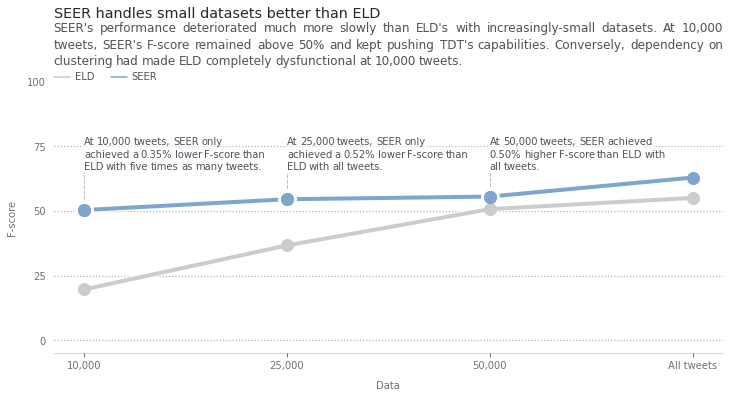

In [6]:
_df = df.sort_values(by='step')
_x = _df.step.tolist()
annotations = { (0, df[(df.algorithm == 'SEER') & (df.step == 0)].iloc[0]['f-score']): """
                At 10,000 tweets, SEER only achieved a 0.35% lower F-score than ELD with five times as many tweets.""",
                (1, df[(df.algorithm == 'SEER') & (df.step == 1)].iloc[0]['f-score']): """
                At 25,000 tweets, SEER only achieved a 0.52% lower F-score than ELD with all tweets.""",
                (2, df[(df.algorithm == 'SEER') & (df.step == 2)].iloc[0]['f-score']): """
                At 50,000 tweets, SEER achieved 0.50% higher F-score than ELD with all tweets.""",
              }

# draw the visualization
figure = plt.figure(figsize=(12,5))
viz = drawable.Drawable(figure)
viz.draw_time_series(_df[_df.algorithm == 'ELD'].step, _df[_df.algorithm == 'ELD']['f-score'].tolist(),
                     'ELD', color='C5', **style)
viz.scatter(_df[_df.algorithm == 'ELD'].step, _df[_df.algorithm == 'ELD']['f-score'].tolist(),
            color='C5', **scatter_style)
viz.draw_time_series(_df[_df.algorithm == 'SEER'].step, _df[_df.algorithm == 'SEER']['f-score'].tolist(),
                     'SEER', color='C1', **style)
viz.scatter(_df[_df.algorithm == 'SEER'].step, _df[_df.algorithm == 'SEER']['f-score'].tolist(),
            color='C1', **scatter_style)

# draw the annotations
viz.set_ylim(-5, 100)
ylim = viz.get_ylim()
for (x, y), label in annotations.items():
    viz.vlines(x, ymin=y, ymax=65, **line_style)
    viz.plot(x, y, color='C1', **annotation_marker_style)
    viz.annotate(label, (x, x + 0.9), 65, **annotation_style)

# finalize the visualization
viz.set_xticks(_df[_df.algorithm == 'ELD'].step.tolist())
viz.set_xticklabels(_df[_df.algorithm == 'ELD'].data)
viz.set_ylim(-5, 100)
viz.set_yticks(range(0, 100+1, 25))
viz.set_yticklabels(range(0, 100+1, 25))
viz.set_axisbelow(True)
viz.set_xlabel('Data')
viz.set_ylabel('F-score')
viz.set_title("SEER handles small datasets better than ELD", loc='left')
viz.set_caption(f"""SEER's performance deteriorated much more slowly than ELD's with increasingly-small datasets.
                    At 10,000 tweets, SEER's F-score remained above 50% and kept pushing TDT's capabilities.
                    Conversely, dependency on clustering had made ELD completely dysfunctional at 10,000 tweets.""",
                align='justify')

viz.savefig('../exports/6.3-sensitivity.png', dpi=300, bbox_inches='tight')